<a href="https://colab.research.google.com/github/MarwaFA21/Marwa-Code/blob/main/Tugas_Individu_2_Data_csv_Marwa_FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Clustering
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data.

Akan dilakukan pengelompokan negara-negara di dunia berdasarkan pendapatan dan harapan hidup. Untuk penentuan jumlah cluster terbaiknya dengan menggunakan metode silhouette.

#Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#import data
from google.colab import files
import io
uploaded = files.upload()

Saving Country-data.csv to Country-data (1).csv


In [ ]:
#memanggil data
data = pd.read_csv('Country-data.csv',sep=",")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#Dataset Understanding

In [ ]:
#melihat jenis data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Interpretasi**

---
Dari hasil output di atas, dapat dilihat bahwa tipe datanya adalah numerical yang berarti bahwa datanya berupa data kuantitatif yang nilainya berupa angka dengan tipe data yang digunakan, yaitu tipe data integer dan float serta data kualitatif berupa object. Tipe data integer adalah tipe data yang menyatakan bilangan bulat dan untuk tipe data float adalah tipe data yang menyatakan bilangan yang memiliki koma (desimal). Variabel yang bertipe data integer adalah variabel income dan gdpp. Sedangkan, untuk variabel yang bertipe data float adalah child_mort, export, health, imports, inflation, life_expec, total_fer. Untuk variabel yang bertipe object jatuh pada variabel country.

In [ ]:
#melihat bentuk data
data.shape

(167, 10)

**Interpretasi**

---
Berdasarkan output di atas menunjukkan bahwa data yang disajikan memiliki 167 baris dan 10 kolom.

In [ ]:
#melihat deskripsi data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Interpretasi**

---
Dari output di atas kita dapat melihat jumlah data, nilai mean, nilai standar deviasi, nilai maksimal, nilai minimal, nilai quantile 1, quantile 2 dan quntile 3.

#Data Pre-Processing

In [ ]:
#karena atribut yang digunakan hanya income dan life_expec jadi atribut selain keduanya bisa dilakukan dropping
data.drop(['child_mort', 'exports', 'health', 'imports', 'inflation', 'total_fer', 'gdpp'], axis = 1, inplace = True)
data.head()

,country,income,life_expec
0,Afghanistan,1610,56.2
1,Albania,9930,76.3
2,Algeria,12900,76.5
3,Angola,5900,60.1
4,Antigua and Barbuda,19100,76.8


In [ ]:
#melihat jumlah duplikasi data
data.duplicated().sum()

0

In [ ]:
#melihat missing values
data.isnull().any()

country       False
income        False
life_expec    False
dtype: bool

**Interpretasi**

---

Setelah dilakukan pengecekan, terlihat bahwa tidak adanya gejala duplikasi data pada dataset yang tersedia serta jumlah missing value pada setiap kolomnya adalah 0.

#Analisis Multivariat

In [ ]:
#melihat korelasi antar variabel
data.corr()

<ipython-input-10-9040e5510fa3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,income,life_expec
income,1.000000,0.611962
life_expec,0.611962,1.000000


**Interpretasi**


---
Berdasarkan output korelasi antar variabel di atas, dapat diketahui bahwa antara variabel life_expec dengan variabel income memiliki hubungan yang kuat dan positif dengan nilai korelasinya sebesar 0.611892.

#Analisis Data Eksploratif Univariat dan Bivariat

<Axes: xlabel='income', ylabel='Count'>

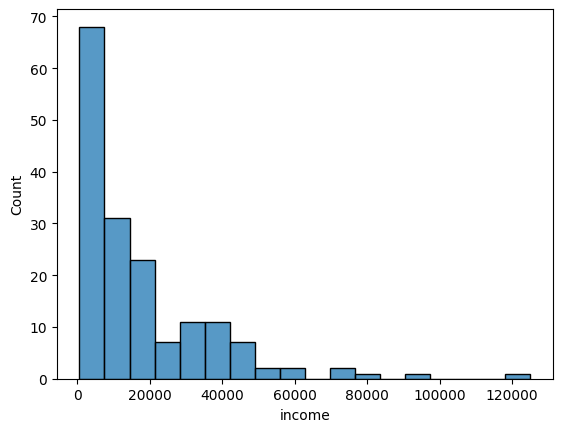

In [ ]:
sns.histplot(x = data ['income'])

<Axes: xlabel='life_expec', ylabel='Count'>

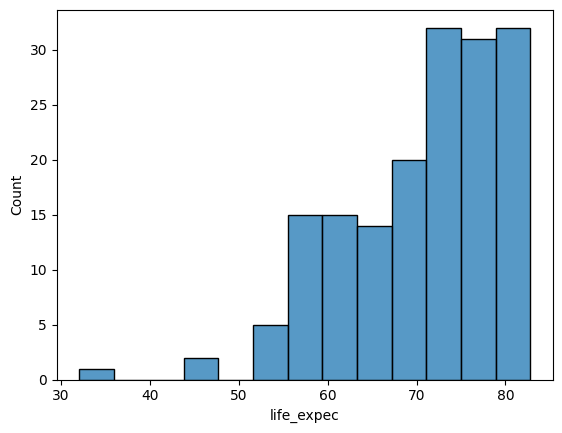

In [ ]:
sns.histplot(x = data ['life_expec'])

<Axes: xlabel='life_expec', ylabel='income'>

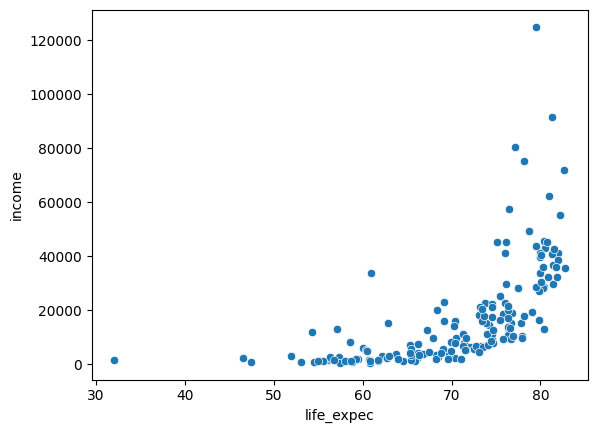

In [ ]:
sns.scatterplot(x = data['life_expec'], y = data['income'])

**Interpretasi**


---
Berdasarkan output scatter plot di atas, dapat disimpulkan bahwa antara variabel life_expec dan income memiliki hubungan yang kuat. Hal ini dikarenakan bentuk scatter plot kedua variabel tersebut tidak berpola.

# Algoritma Machine Learning

In [ ]:
# Scaling merupakan proses normalisasi agar variabel memiliki satuan atau rentang yang sama
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(data[['life_expec','income']].astype(float))

In [ ]:
# k-means clustering, n merupakan banyak cluster yang ingin kita bentuk, random state digunakan untuk mengontrol randomisasi supaya apabila terjadi iterasi, data tersebut tetap
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['life_expec', 'income'])
new_dfoutlier_std['label_kmeans1'] = labels1

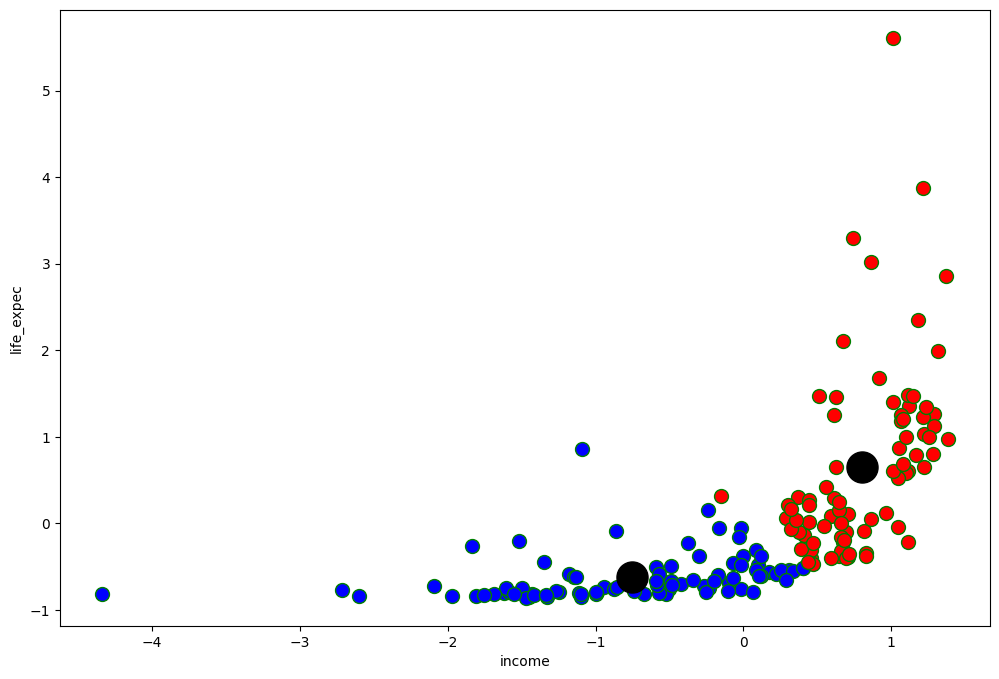

In [ ]:
# PLOTING untuk melihat clusternya masing-masing
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans1 == 0],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans1 == 0],
            c='blue',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans1 == 1],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans1 == 1],
            c='red',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('income')
plt.ylabel('life_expec')
plt.show()

**Interpretasi**

---
Dari output di atas terbentuk 2 cluster, cluster 1 diberi warna biru dan cluster 2 diberi warna merah.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

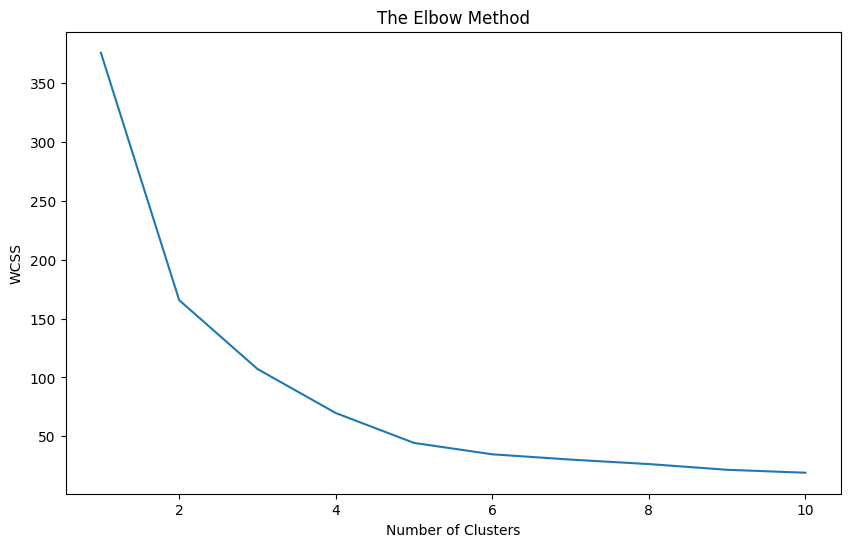

In [ ]:
#metode elbow adalah penentuan cluster optimum berdasarkan gambar/plot. Hasilnya akan terlalu biar karena implementasi setiap orang beda-beda
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Interpretasi**

---
Berdasarkan output di atas, dengan menggunakan metode elbow pada k-means clustering didapatkan jumlah cluster optimum sebanyak 2. Hal ini dikarenakan pada jumlah cluster tersebut bentuk garisnya menyiku.

In [ ]:
#metode silhouette merupakan metode yang lebih tepat untuk menentukan jumlah cluster
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(new_dfoutlier_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(new_dfoutlier_std,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.5418109746793173
Silhouette score for k(clusters) = 3 is 0.4647513641367838
Silhouette score for k(clusters) = 4 is 0.5163028816336946


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.549849197228401


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.5560726564863546


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.552281274417639
Silhouette score for k(clusters) = 8 is 0.5007522592976835


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.47194173683321294


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 10 is 0.47726113604201104


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 11 is 0.4253823470612062
Silhouette score for k(clusters) = 12 is 0.4053115851630338


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


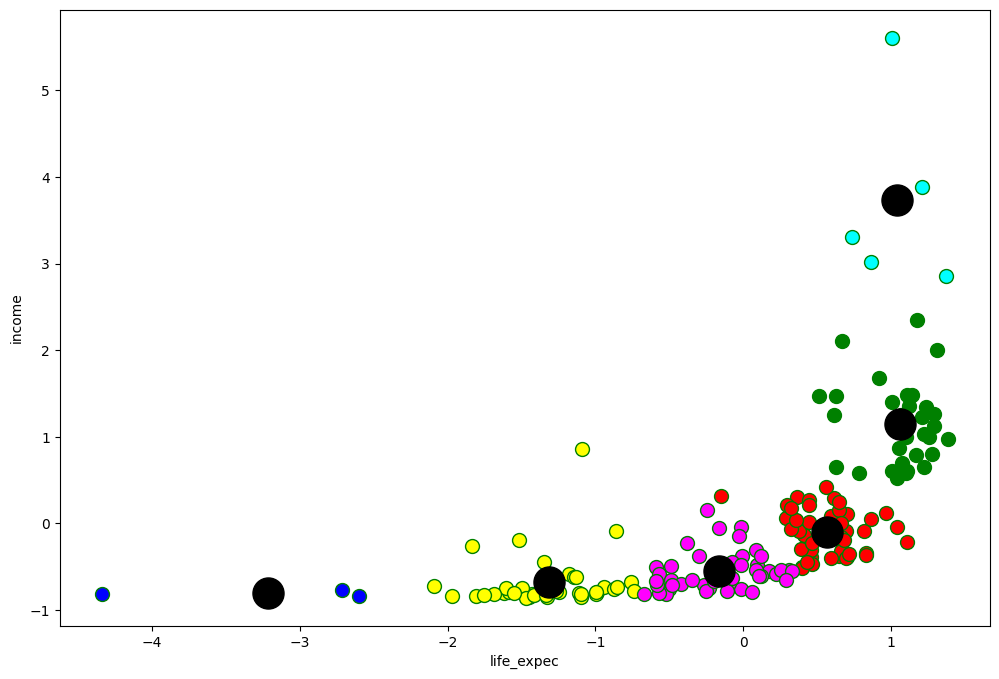

In [ ]:
#mencari clusternya berdasarkan nilai silhouette terbesar
kmeans2 = KMeans(n_clusters=6, init='k-means++', random_state=42).fit(dfoutlier_std)

labels2 = kmeans2.labels_
new_dfoutlier_std['label_kmeans2'] = labels2

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 0],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 0],
            c='red',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 1],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 1],
            c='yellow',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 2],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 2],
            c='green',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 3],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 3],
            c='blue',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 4],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 4],
            c='cyan',
            s=100,
            edgecolor='green',
            linestyle='-')
plt.scatter(new_dfoutlier_std['life_expec'][new_dfoutlier_std.label_kmeans2 == 5],
            new_dfoutlier_std['income'][new_dfoutlier_std.label_kmeans2 == 5],
            c='magenta',
            s=100,
            edgecolor='green',
            linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('life_expec')
plt.ylabel('income')
plt.show()

**Interpretasi**

---
Berdasarkan output di atas dengan menggunakan metode silhouette didapatkan jumlah cluster optimumnya sebanyak 6 cluster. Hal ini dikarenakan pada jumlah cluster tersebut memiliki nilai silhouette paling tinggi dibandingkan dengan nilai silhouette pada jumlah cluster lainnya.

In [ ]:
#melihat label dari masing-masing negara
kmeans2.labels_

array([1, 0, 0, 1, 0, 0, 5, 2, 2, 5, 0, 2, 5, 0, 5, 2, 5, 1, 5, 5, 0, 1,
       0, 4, 0, 1, 1, 5, 1, 2, 5, 3, 1, 0, 0, 0, 5, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 5, 0, 1, 1, 0, 5, 2, 2, 1, 5, 5, 2, 1, 2, 5, 5, 1, 1, 5,
       3, 0, 2, 5, 5, 0, 5, 2, 2, 2, 0, 2, 0, 5, 1, 1, 4, 5, 1, 0, 0, 3,
       1, 2, 0, 4, 0, 1, 1, 0, 0, 1, 2, 5, 0, 5, 5, 5, 0, 5, 1, 5, 1, 5,
       2, 2, 1, 1, 2, 2, 5, 0, 0, 0, 5, 0, 2, 4, 0, 0, 5, 5, 2, 1, 0, 0,
       1, 4, 0, 2, 1, 1, 2, 2, 0, 5, 5, 5, 2, 2, 5, 1, 0, 5, 1, 5, 0, 0,
       5, 1, 5, 2, 2, 2, 0, 5, 1, 0, 5, 5, 1], dtype=int32)

**Interpretasi**

---
Output di atas merupakan hasil dari label dari data objek pada algoritma k-means yang digunakan untuk mengelompokkan data.

In [ ]:
#membuat dataframe label
labels = pd.DataFrame(kmeans2.labels_)
labels.head()

,0
0,1
1,0
2,0
3,1
4,0


In [ ]:
#mengganti nama kolom labels
label = labels.rename(columns = {0: "labels"})
label.head()

,labels
0,1
1,0
2,0
3,1
4,0


In [ ]:
#menambah kolom kmeans2.labels_ pada dataframe data
df = pd.concat([data, label], axis = 1)
df

,country,income,life_expec,labels
0,Afghanistan,1610,56.2,1
1,Albania,9930,76.3,0
2,Algeria,12900,76.5,0
3,Angola,5900,60.1,1
4,Antigua and Barbuda,19100,76.8,0
...,...,...,...,...
162,Vanuatu,2950,63.0,1
163,Venezuela,16500,75.4,0
164,Vietnam,4490,73.1,5
165,Yemen,4480,67.5,5


In [ ]:
#melihat jumlah negara pada setiap cluster
jml_neg_per_cluster = df['labels'].value_counts()
jml_neg_per_cluster

0    45
5    44
1    37
2    33
4     5
3     3
Name: labels, dtype: int64

**Interpretasi**

---
Berdasarkan output di atas, dapat disimpulkan bahwa terdapat 45 objek pada cluster 1, 37 objek pada cluster pada cluster 2, 33 objek pada cluster 3, 3 objek pada cluster 4, 5 objek pada cluster 5, dan 44 objek pada cluster 6.

In [ ]:
#melihat nama negara kelompok 1 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==0].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
118,Paraguay,7290,74.1,0,0
48,El Salvador,7300,74.1,0,0
76,Jamaica,8000,74.7,0,0
140,Sri Lanka,8560,74.4,0,0
46,Ecuador,9350,76.7,0,0
78,Jordan,9470,75.8,0,0
34,China,9530,74.6,0,0
20,Bosnia and Herzegovina,9720,76.8,0,0
1,Albania,9930,76.3,0,0
119,Peru,9960,77.9,0,0


In [ ]:
#melihat nama negara kelompok 2 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==1].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
37,"Congo, Dem. Rep.",609,57.5,1,1
88,Liberia,700,60.8,1,1
26,Burundi,764,57.7,1,1
112,Niger,814,58.8,1,1
106,Mozambique,918,54.5,1,1
94,Malawi,1030,53.1,1,1
63,Guinea,1190,58.0,1,1
150,Togo,1210,58.7,1,1
132,Sierra Leone,1220,55.0,1,1
93,Madagascar,1390,60.8,1,1


In [ ]:
#melihat nama negara kelompok 3 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==2].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
122,Portugal,27200,79.8,2,2
98,Malta,28300,80.3,2,2
43,Czech Republic,28300,77.5,2,2
135,Slovenia,28700,79.5,2,2
60,Greece,28700,80.4,2,2
89,Libya,29600,76.1,2,2
74,Israel,29600,81.4,2,2
138,South Korea,30400,80.1,2,2
111,New Zealand,32300,80.9,2,2
139,Spain,32500,81.9,2,2


In [ ]:
#melihat nama negara kelompok 4 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==3].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
31,Central African Republic,888,47.5,3,3
66,Haiti,1500,32.1,3,3
87,Lesotho,2380,46.5,3,3


In [ ]:
#melihat nama negara kelompok 5 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==4].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
133,Singapore,72100,82.7,4,4
82,Kuwait,75200,78.2,4,4
23,Brunei,80600,77.1,4,4
91,Luxembourg,91700,81.3,4,4
123,Qatar,125000,79.5,4,4


In [ ]:
#melihat nama negara kelompok 6 secara langsung
df2=df.copy()
df2['kluster'] = kmeans2.labels_
df2[df2['kluster']==5].sort_values(by=['income'])

,country,income,life_expec,labels,kluster
126,Rwanda,1350,64.6,5,5
36,Comoros,1410,65.9,5,5
56,Gambia,1660,65.5,5,5
149,Timor-Leste,1850,71.1,5,5
109,Nepal,1990,68.3,5,5
146,Tajikistan,2110,69.6,5,5
12,Bangladesh,2440,70.4,5,5
27,Cambodia,2520,66.1,5,5
83,Kyrgyz Republic,2790,68.5,5,5
99,Mauritania,3320,68.2,5,5


In [ ]:
df2['df.copy()'] = kmeans2.labels_

In [ ]:
#mencari statistik deskriptif cluster 1
df2[df2['kluster']==0].describe()

,income,life_expec,labels,kluster,df.copy()
count,45.000000,45.000000,45.0,45.0,45.0
mean,15226.888889,75.584444,0.0,0.0,0.0
std,4989.102589,2.009518,0.0,0.0,0.0
min,7290.000000,69.200000,0.0,0.0,0.0
25%,10500.000000,74.200000,0.0,0.0,0.0
50%,15300.000000,75.800000,0.0,0.0,0.0
75%,19100.000000,76.700000,0.0,0.0,0.0
max,25200.000000,80.400000,0.0,0.0,0.0


In [ ]:
#mencari statistik deskriptif cluster 2
df2[df2['kluster']==1].describe()

,income,life_expec,labels,kluster,df.copy()
count,37.000000,37.000000,37.0,37.0,37.0
mean,4076.621622,58.886486,1.0,1.0,1.0
std,6125.752958,3.061786,0.0,0.0,0.0
min,609.000000,52.000000,1.0,1.0,1.0
25%,1390.000000,56.800000,1.0,1.0,1.0
50%,1870.000000,58.800000,1.0,1.0,1.0
75%,3280.000000,60.900000,1.0,1.0,1.0
max,33700.000000,64.000000,1.0,1.0,1.0


In [ ]:
#mencari statistik deskriptif cluster 3
df2[df2['kluster']==2].describe()

,income,life_expec,labels,kluster,df.copy()
count,33.000000,33.000000,33.0,33.0,33.0
mean,39233.333333,79.927273,2.0,2.0,2.0
std,8817.194376,2.008618,0.0,0.0,0.0
min,27200.000000,75.100000,2.0,2.0,2.0
25%,32300.000000,79.500000,2.0,2.0,2.0
50%,39800.000000,80.300000,2.0,2.0,2.0
75%,44000.000000,81.400000,2.0,2.0,2.0
max,62300.000000,82.800000,2.0,2.0,2.0


In [ ]:
#mencari statistik deskriptif cluster 4
df2[df2['kluster']==3].describe()

,income,life_expec,labels,kluster,df.copy()
count,3.000000,3.000000,3.0,3.0,3.0
mean,1589.333333,42.033333,3.0,3.0,3.0
std,750.000889,8.617037,0.0,0.0,0.0
min,888.000000,32.100000,3.0,3.0,3.0
25%,1194.000000,39.300000,3.0,3.0,3.0
50%,1500.000000,46.500000,3.0,3.0,3.0
75%,1940.000000,47.000000,3.0,3.0,3.0
max,2380.000000,47.500000,3.0,3.0,3.0


In [ ]:
#mencari statistik deskriptif cluster 5
df2[df2['kluster']==4].describe()

,income,life_expec,labels,kluster,df.copy()
count,5.00000,5.00000,5.0,5.0,5.0
mean,88920.00000,79.76000,4.0,4.0,4.0
std,21505.04592,2.26892,0.0,0.0,0.0
min,72100.00000,77.10000,4.0,4.0,4.0
25%,75200.00000,78.20000,4.0,4.0,4.0
50%,80600.00000,79.50000,4.0,4.0,4.0
75%,91700.00000,81.30000,4.0,4.0,4.0
max,125000.00000,82.70000,4.0,4.0,4.0


In [ ]:
#mencari statistik deskriptif cluster 6
df2[df2['kluster']==5].describe()

,income,life_expec,labels,kluster,df.copy()
count,44.000000,44.000000,44.0,44.0,44.0
mean,6432.954545,69.095455,5.0,5.0,5.0
std,4285.956288,2.564422,0.0,0.0,0.0
min,1350.000000,64.600000,5.0,5.0,5.0
25%,3362.500000,66.675000,5.0,5.0,5.0
50%,5505.000000,69.350000,5.0,5.0,5.0
75%,7835.000000,71.300000,5.0,5.0,5.0
max,20100.000000,73.500000,5.0,5.0,5.0


#**KESIMPULAN**

Pada pemodelan machine learning di atas dataset yang digunakan berupa data country yang diambil melalui database yang tersedia di kaggle. Terdapat banyak atribut yang tersedia pada data tersebut, diantaranya child_mort (kematian anak di bawah usia 5 tahun per 1000 kelahiran hidup), exports (ekspor barang dan jasa per kapita yang disajikan dalam bentuk persentase dari PDB per kapita), heatlh (total pengeluaran kesehatan per kapita), imports (impor barang dan jasa per kapita yang disajikan dalam bentuk ppersentase dari PDB per kapita), income (pendapatan bersih per orang), inflation (pengukuran tingkat pertumbuhan tahunan dari total PDB), life_expec (jumlah rata-rata tahun seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama), total_fer (jumlah anak yang akan dilahirkan oleh setiap wanita jika kesuburan usia saat ini tetap sama), dan gdpp (PDB per kapita yang dihitung sebagai total PDB dibagi dengan total populasi). Pada kasus ini, akan dilakukan pengelompokkan negara-negara di dunia berdasarkan pendapatan dan harapan hidup sehingga data yang akan digunakan adalah income dan life_expec. Setelah dilakukan running function, didapatkan jumlah kelompok optimum sebanyak 6 kelompok yang ditentukan melalui nilai silhouette terbesar yaitu sebesar 0.5560726564863546. Yang mana kelompok 1 terdiri dari 45 negara, kelompok 2 terdiri dari 37 negara, kelompok 3 terdiri dari 33 negara, kelompok 4 terdiri dari 3 negara, kelompok 5 terdiri dari 5 negara dan kelompok 6 terdiri dari 44 negara. Selain itu, dicari juga statistik deskripsi pada setiap kelompok untuk melihat karakteristiknya mrlalui rata-rata income dan life_excpec yang dimiliki.